## Final Project Submission

Please fill out:
* Student name: Eric Lemiso Lekishon
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Samwel jane
* Blog post URL:


# PROJECT OVERVIEW

This project uses exploratory data analysis to generate insights for a business stakeholder.

# BUSINESS PROBLEM

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. I am charged with exploring what types of films are currently doing the best at the box office, then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

# DATA UNDERSTANDING

Box office has a large dataset that shows the financial details, ratings,gross performance of different films.  Each genre has an average rating, start year,primary title and runtime in minutes.

In [245]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [246]:
#Loading the "imdb.title.basics" dataset and the "imdb.title.ratings" data set
basics_df = pd.read_csv('title.basics.csv')
ratings_df = pd.read_csv('title.ratings.csv')


In [247]:
# Getting basic information about "imdb.title.basics" the dataset
basics_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146143 non-null  object 
 2   original_title   146122 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [248]:
# Getting basic information about the "imdb.title.ratings" dataset
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


DATA CLEANING

In [269]:
#checking on missing values
basics_df.isnull().sum()

tconst                 0
primary_title          1
original_title        22
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [250]:
#imputing the missing values in "runtime_minutes" using median
median_runtime = df['runtime_minutes'].median()
df['runtime_minutes'].fillna(median_runtime, inplace=True)

In [251]:
#imputing the missing values in "genre" using mode(most occuring genre)
most_common_genre = df['genres'].mode().iloc[0]
df['genres'].fillna(most_common_genre, inplace=True)

In [252]:
basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [253]:
#I started by dropping duplicates,then sample to get an overview of the DataFrame
basics_df.drop_duplicates()
sample_df = basics_df.sample(n=20)
sample_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
5328,tt10461666,Recovering Forgotten History,Recovering Forgotten History,2019,NaN,History
83169,tt4799426,Pentatonix: On My Way Home,Pentatonix: On My Way Home,2015,90.0,"Documentary,Music"
100056,tt5846848,Christmas Is Real,Christmas Is Real,2016,48.0,"Documentary,History"
60639,tt3509176,Die Moskauer Prozesse,Die Moskauer Prozesse,2014,84.0,"Documentary,History"
127207,tt7784818,Unexpected Arrival,Unexpected Arrival,2017,NaN,NaN
24264,tt1980209,Pain & Gain,Pain & Gain,2013,129.0,"Action,Comedy,Crime"
31806,tt2199679,Theatre of the Dead,Theatre of the Dead,2013,85.0,"Action,Horror,Thriller"
23128,tt1945148,Off the Boulevard,Off the Boulevard,2011,96.0,"Biography,Comedy,Documentary"
136353,tt8684952,Kubrick's Odyssey II: Secrets Hidden in the Fi...,Kubrick's Odyssey II: Secrets Hidden in the Fi...,2012,61.0,Documentary
52508,tt3105500,E muet,E muet,2013,55.0,"Documentary,Romance"


In [254]:
# Then dropping rows with NaN values in the 'runtime_minutes' and 'genres' columns
Cleaned_basics_df = basics_df.dropna(subset=['runtime_minutes', 'genres'])
Cleaned_basics_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [255]:
# checking if there are missing values in the ratings Dataset before merging with the cleaned_basics Dataset
ratings_df.isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [256]:
# merging the two Datasets for analysis using .merge() method
combined_df = pd.merge(Cleaned_basics_df, ratings_df, on='tconst')
combined_df

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
65715,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65716,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
65717,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [257]:
# having a look at the combined dataset
combined_df.info()
combined_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65720 entries, 0 to 65719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.0+ MB


tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [258]:
#dropping columns not needed
df = combined_df.drop(columns=['tconst'])
df

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...
65715,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65716,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
65717,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


# Data Analysis

I started by having an overview of the top rate movies and low rated movies.
Then explored on the distribution of genres, to check on which is highly or lowly distributed.

In [259]:
# finding the top-rated movies based on IMDb ratings
top_rated_movies = df.sort_values(by='averagerating', ascending=False)
print("Top-Rated Movies:")
print(top_rated_movies[['primary_title', 'start_year', 'averagerating']].head(10))

Top-Rated Movies:
                                           primary_title  start_year  \
763            The Dark Knight: The Ballad of the N Word        2018   
48436                The Paternal Bond: Barbary Macaques        2015   
38900                              I Was Born Yesterday!        2015   
58850  Ellis Island: The Making of a Master Race in A...        2018   
54672                              Requiem voor een Boom        2016   
63823                      Pick It Up! - Ska in the '90s        2019   
610       Exteriores: Mulheres Brasileiras na Diplomacia        2018   
57886    A Dedicated Life: Phoebe Brand Beyond the Group        2015   
24816                              Hercule contre Hermès        2012   
59019                                     Calamity Kevin        2019   

       averagerating  
763             10.0  
48436           10.0  
38900           10.0  
58850           10.0  
54672           10.0  
63823           10.0  
610             10.0  
57886

In [260]:
#finding the lowest rated movies
lowest_rated_movies = df.sort_values(by='averagerating', ascending=True)

# Displaying the lowest-rated movies
print("Lowest-Rated Movies:")
print(lowest_rated_movies[['primary_title', 'start_year', 'averagerating']].head(10))

Lowest-Rated Movies:
                           primary_title  start_year  averagerating
53667                         Onverwacht        2011            1.0
54837                Ya vas vsyekh ub'yu        2016            1.0
51698            Delusion of Persecution        2016            1.0
45393  Pure Hearts: Into Chinese Showbiz        2015            1.0
30022                             Ryûsei        2013            1.0
51643                    Bloody Massacre        2016            1.0
19564                    Finding Anthony        2012            1.0
22732           Momok jangan cari pasal!        2012            1.0
12677                 In a Lonely Planet        2011            1.0
62819               Glaza i mir. Chast 1        2018            1.0


In [261]:
#Exploring the distribution of movie genres in the dataset by split method and explode the 'genres' column to separate genres
genres = df['genres'].str.split(',').explode()
genre_counts = genres.value_counts()
genre_counts 


genres
Drama          28394
Documentary    16423
Comedy         15514
Thriller        7583
Horror          6917
Action          6297
Romance         5976
Crime           4338
Biography       3693
Adventure       3621
Family          3231
Mystery         2889
History         2704
Sci-Fi          2048
Fantasy         1969
Music           1844
Animation       1615
Sport           1099
War              795
Musical          638
News             575
Western          256
Reality-TV        13
Game-Show          2
Adult              2
Short              1
Name: count, dtype: int64

C:\Users\Sieku\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sieku\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sieku\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


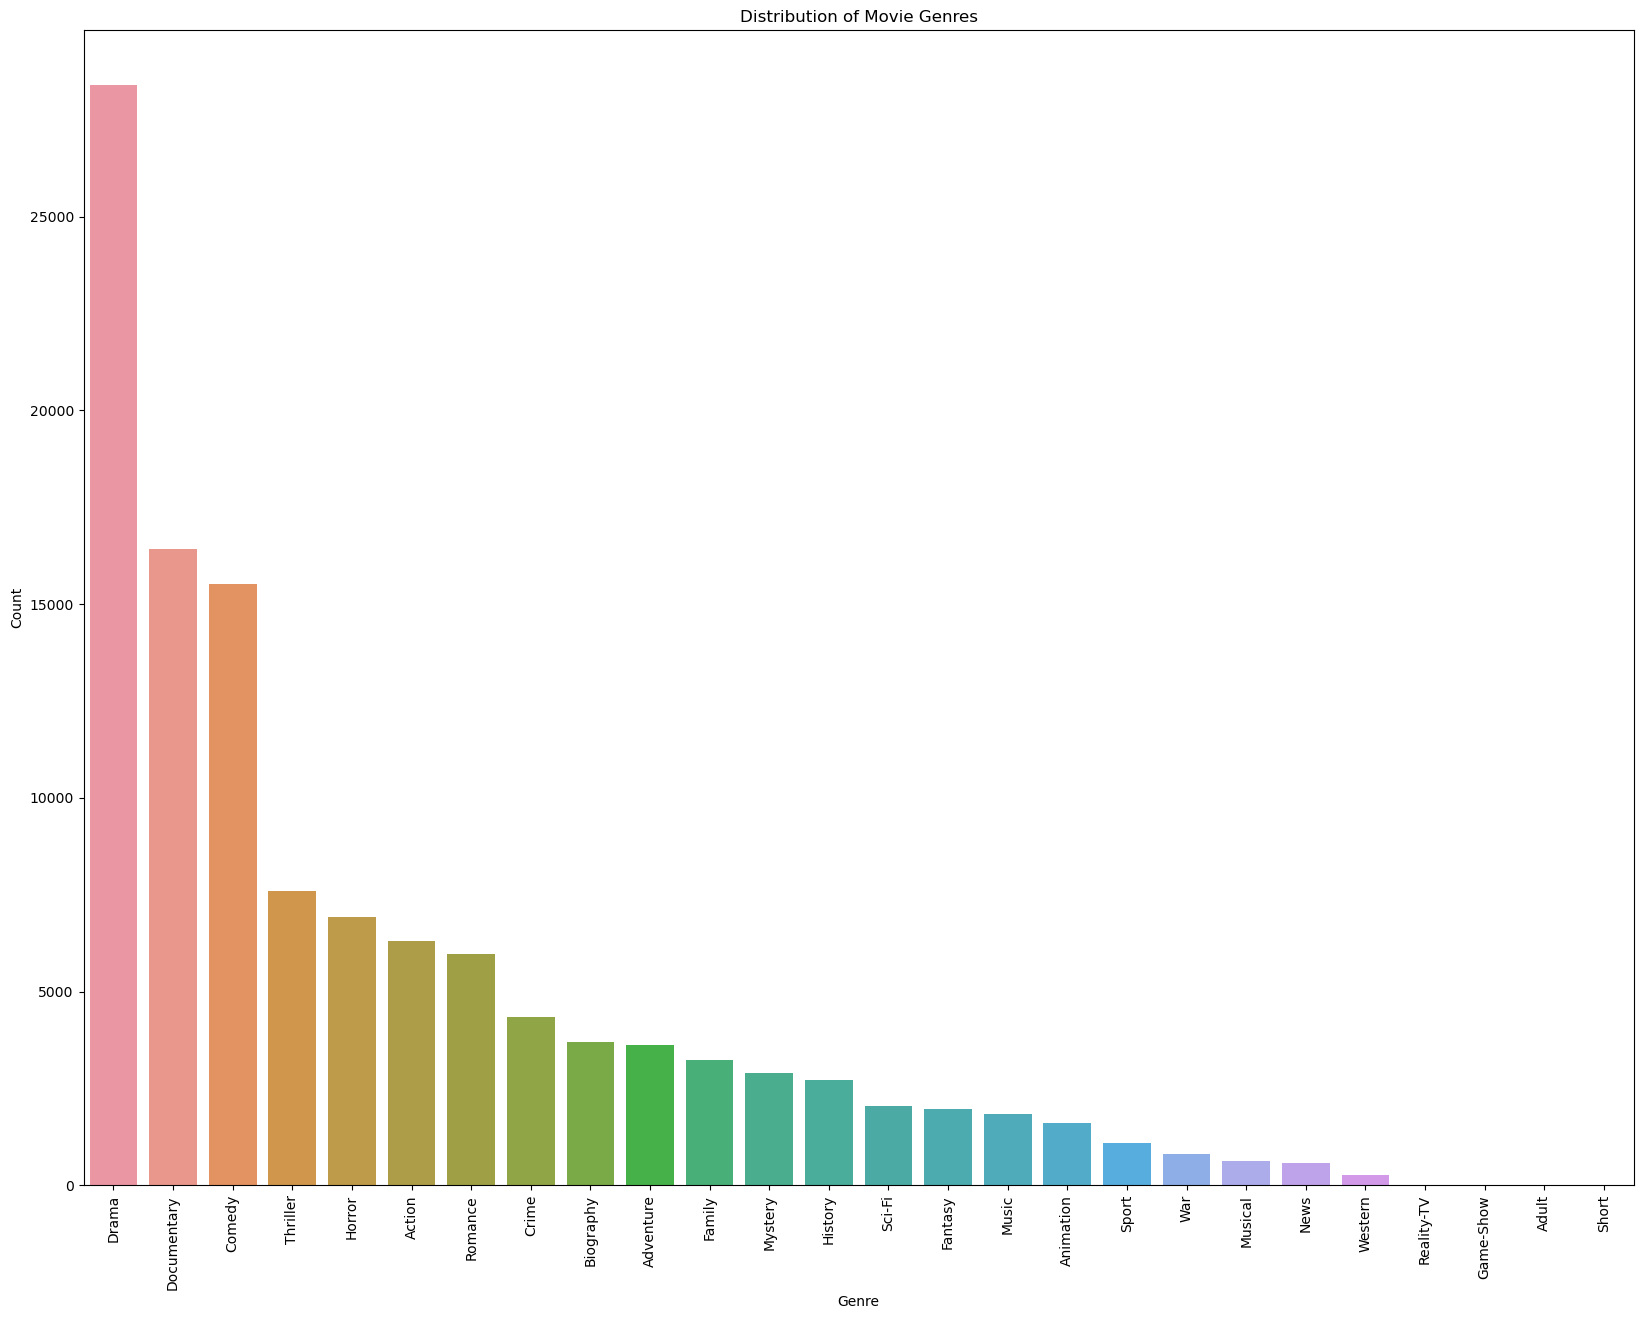

In [263]:
#visualizing genre distribution using bar plot
plt.figure(figsize=(20, 15))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [332]:
#descriptive analysis
df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross
count,2973.000000,2973.000000,2973.000000,2.973000e+03,2.973000e+03,2.969000e+03
mean,2013.786747,107.320552,6.461789,6.282036e+04,3.041947e+07,4.742381e+07
std,2.461329,19.906558,0.997358,1.263703e+05,6.689915e+07,1.151021e+08
min,2010.000000,40.000000,1.600000,5.000000e+00,0.000000e+00,0.000000e+00
25%,2012.000000,94.000000,5.900000,2.486000e+03,1.250000e+05,0.000000e+00
50%,2014.000000,105.000000,6.600000,1.375500e+04,1.900000e+06,2.300000e+06
75%,2016.000000,118.000000,7.100000,6.600800e+04,3.190000e+07,3.360000e+07
max,2019.000000,272.000000,9.200000,1.841066e+06,7.001000e+08,9.464000e+08


# Handling Outliers


After checking on the distribution, i analyzed the runtime column just to check on the extreme runtime in minutes

C:\Users\Sieku\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


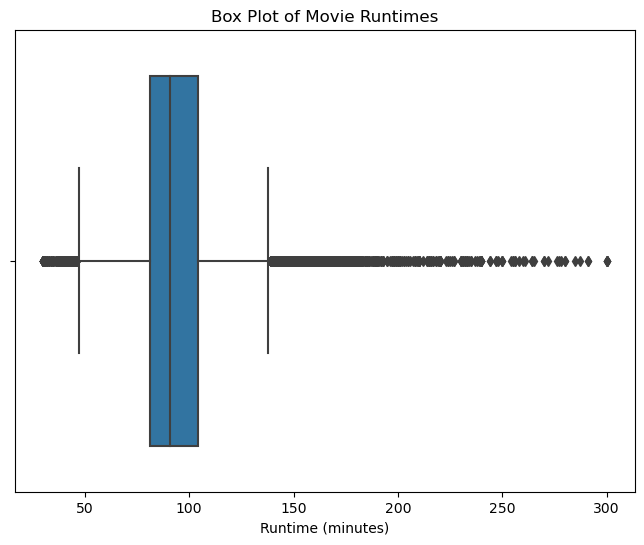

In [265]:
# Creating a box plot to visualize runtime trends and identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_df['runtime_minutes'])
plt.title('Box Plot of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.show()

In [266]:
# Filtering out movies with extreme runtimes (very short or very long)
runtime_threshold = (df['runtime_minutes'] >= 30) & (df['runtime_minutes'] <= 300)
filtered_df =df[runtime_threshold]
filtered_df

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...
65715,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65716,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
65717,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


C:\Users\Sieku\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sieku\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


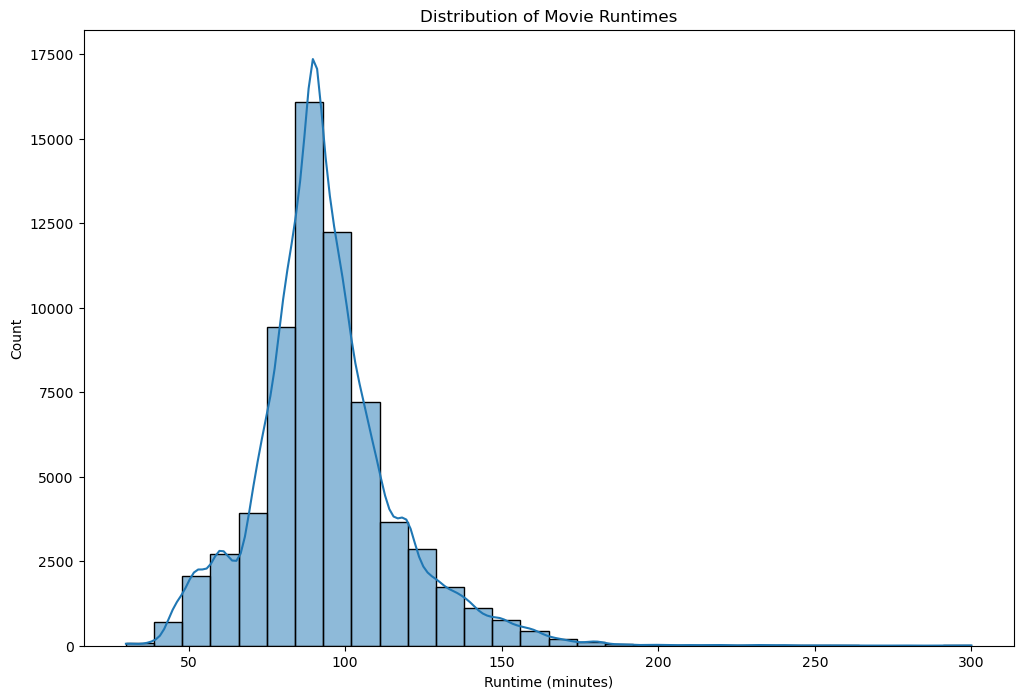

In [267]:
# Creating a histogram to visualize the distribution of movie runtimes
plt.figure(figsize=(12, 8))
sns.histplot(filtered_df['runtime_minutes'], bins=30, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Count')
plt.show()


Movies with a run time of 90 minutes have the most count.The count gradually increases from 50 minutes to 90 as the peak the it gradually falls to 300 minutes as an outlier.

In [268]:
df = filtered_df
df

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...
65715,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65716,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
65717,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


# BIVARIATE ANALYSIS

Performed a bivariate analysis between two numerical variables,average rating and number of votes to check on the relationship

In [270]:
#Exploring the relationship between numvotes and averagerating using correlation
correlation = df['averagerating'].corr(df['numvotes'])
if correlation > 0:
    feedback = "There is a positive correlation between ratings and the number of votes."
elif correlation < 0:
    feedback = "There is a negative correlation between ratings and the number of votes."
else:
    feedback = "There is no significant correlation between ratings and the number of votes."
print(correlation)
print(feedback)

0.049196411072546846
There is a positive correlation between ratings and the number of votes.


In [271]:
correlation_matrix = df[[ 'averagerating', 'numvotes']].corr()
print(correlation_matrix)

               averagerating  numvotes
averagerating       1.000000  0.049196
numvotes            0.049196  1.000000


C:\Users\Sieku\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sieku\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'Number of Votes')

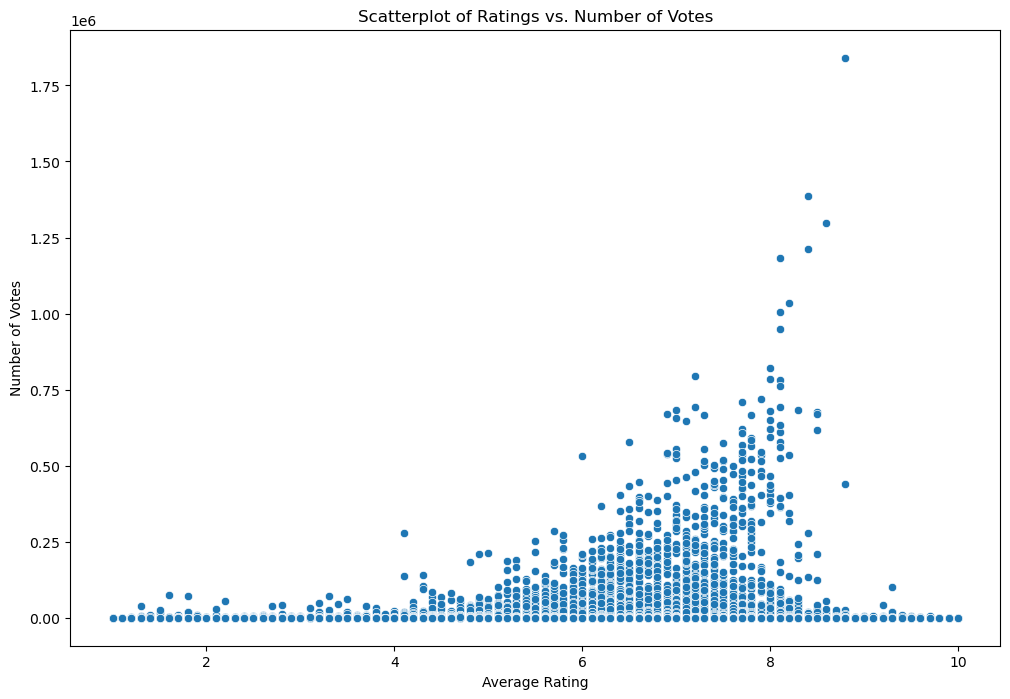

In [275]:
# Creating a scatterplot to visualize the relationship
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='averagerating', y='numvotes')
plt.title('Scatterplot of Ratings vs. Number of Votes')
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')


In [274]:
df['decade'] = (df['start_year'] // 10) * 10

# Grouping the data by decade and calculate the average rating for each decade
decade_ratings = df.groupby('decade')['averagerating'].mean()
decade_ratings


C:\Users\Sieku\AppData\Local\Temp\ipykernel_9428\3146013470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['decade'] = (df['start_year'] // 10) * 10


decade
2010    6.316678
Name: averagerating, dtype: float64

# Identifying the most popular and successful genres based on ratings and box office performance.

I started by loading the data, having an overview and cleaning afterwards before doing analysis

In [276]:
# loading data from 'bom.movie_gross.csv' data set 
df2= pd.read_csv('bom.movie_gross.csv')
df2

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [277]:
#cleaning the data set
df2.drop_duplicates()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [278]:
#checking on information in the dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [279]:
#checking if there are missing values
df2.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [280]:
# Filling missing values in 'domestic_gross' and 'foreign_gross' with zeros
df2['domestic_gross'].fillna(0, inplace = True)
df2['foreign_gross'].fillna(0, inplace = True)

In [281]:
# Checking if there are any remaining missing values in the Dataset
missing_values = df2.isnull().sum()
print(missing_values)

title             0
studio            5
domestic_gross    0
foreign_gross     0
year              0
dtype: int64


In [282]:
df2.sample(20)

,title,studio,domestic_gross,foreign_gross,year
1446,Our Children,Distrib.,23200.0,0,2013
2174,Love and Lost (Shi Gu),CL,189000.0,0,2015
2905,Wish Upon,BG,14300000.0,0,2017
1083,Vulgaria,CL,59100.0,0,2012
1327,Stand Up Guys,LGF,3300000.0,0,2013
901,The Sessions,FoxS,6000000.0,3100000,2012
1353,The Kings of Summer,CBS,1300000.0,0,2013
2262,The Keeping Room,Drft.,27200.0,0,2015
3232,Can You Ever Forgive Me?,FoxS,8800000.0,0,2018
1917,The Hateful Eight,Wein.,54100000.0,101600000,2015


# Merging gross data set and the combined data set of ratings and basics for further analysis

In [283]:
# Merging the datasets 
merged_data = df.merge(df2, left_on='primary_title', right_on='title', how='inner')

# Grouping the merged data by genres
grouped_data = merged_data.groupby('genres')
grouped_data.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,decade,title,studio,domestic_gross,foreign_gross,year
0,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,2010,Wazir,Relbig.,1100000.0,0,2016
1,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,2010,On the Road,IFC,744000.0,8000000,2012
2,On the Road,On the Road,2014,89.0,Drama,6.0,6,2010,On the Road,IFC,744000.0,8000000,2012
3,On the Road,On the Road,2016,121.0,Drama,5.7,127,2010,On the Road,IFC,744000.0,8000000,2012
4,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,2010,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954,Detective Chinatown 2,Tang ren jie tan an 2,2018,121.0,"Action,Comedy,Mystery",6.1,1250,2010,Detective Chinatown 2,WB,2000000.0,542100000,2018
2955,Free Solo,Free Solo,2018,100.0,"Documentary,Sport",8.2,32250,2010,Free Solo,NGE,17500000.0,0,2018
2959,They Shall Not Grow Old,They Shall Not Grow Old,2018,99.0,"Documentary,History,War",8.4,15612,2010,They Shall Not Grow Old,WB,18000000.0,0,2018
2965,Gonjiam: Haunted Asylum,Gon-ji-am,2018,95.0,"Horror,Mystery",6.1,2585,2010,Gonjiam: Haunted Asylum,WGUSA,115000.0,0,2018


In [317]:
#dropping columns not needed
columns_to_drop = [ 'title','original_title','decade','studio','year']
df = merged_data.drop(columns_to_drop, axis=1)
df

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross
0,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,1100000.0,0
1,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,744000.0,8000000
2,On the Road,2014,89.0,Drama,6.0,6,744000.0,8000000
3,On the Road,2016,121.0,Drama,5.7,127,744000.0,8000000
4,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,58200000.0,129900000
...,...,...,...,...,...,...,...,...
2968,The Chambermaid,2018,102.0,Drama,7.1,147,300.0,0
2969,How Long Will I Love U,2018,101.0,Romance,6.5,607,747000.0,82100000
2970,Helicopter Eela,2018,135.0,Drama,5.4,673,72000.0,0
2971,Last Letter,2018,114.0,"Drama,Romance",6.4,322,181000.0,0


In [318]:
#checking the data types of data structures in the columns
df.dtypes

primary_title       object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
domestic_gross     float64
foreign_gross       object
dtype: object

In [319]:
# changing foreign gross column to float
df['foreign_gross'] = pd.to_numeric(df['foreign_gross'], errors='coerce')
df

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross
0,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,1100000.0,0.0
1,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,744000.0,8000000.0
2,On the Road,2014,89.0,Drama,6.0,6,744000.0,8000000.0
3,On the Road,2016,121.0,Drama,5.7,127,744000.0,8000000.0
4,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,58200000.0,129900000.0
...,...,...,...,...,...,...,...,...
2968,The Chambermaid,2018,102.0,Drama,7.1,147,300.0,0.0
2969,How Long Will I Love U,2018,101.0,Romance,6.5,607,747000.0,82100000.0
2970,Helicopter Eela,2018,135.0,Drama,5.4,673,72000.0,0.0
2971,Last Letter,2018,114.0,"Drama,Romance",6.4,322,181000.0,0.0


# ANALYSIS ON GENRE BOX OFFICE EARNINGS IN RELATION TO AVERAGE RATING

In [320]:
#sorting the results by the average rating or box office earnings
genre_stats = genre_stats.sort_values(by=['averagerating','domestic_gross'], ascending=False)
genre_stats

,averagerating,domestic_gross
genres,,
Adventure,9.2,3600000.0
"Action,Sport",8.4,4200000.0
"Adventure,Drama,Sci-Fi",8.3,416400000.0
"Biography,Documentary,Family",8.3,24500.0
"Documentary,Sport",8.2,17500000.0
...,...,...
"Fantasy,Horror",3.8,13000000.0
"Drama,Mystery,Western",3.4,354000.0
"Action,Drama,Music",3.4,99600.0


In [321]:
#Calculating the correlation between 'averagerating' and 'domestic_gross' 
correlation = df['averagerating'].corr(df['domestic_gross'])
if correlation > 0:
    feedback = "There is a positive correlation between ratings and domestic gross."
elif correlation < 0:
    feedback = "There is a negative correlation between ratings and the domestic gross."
else:
    feedback = "There is no significant correlation between ratings and the domestic gross."
print(correlation)
print(feedback)

0.12215524950139105
There is a positive correlation between ratings and domestic gross.


In [322]:
correlation_matrix = df[[ 'averagerating', 'domestic_gross']].corr()
print(correlation_matrix)

                averagerating  domestic_gross
averagerating        1.000000        0.122155
domestic_gross       0.122155        1.000000


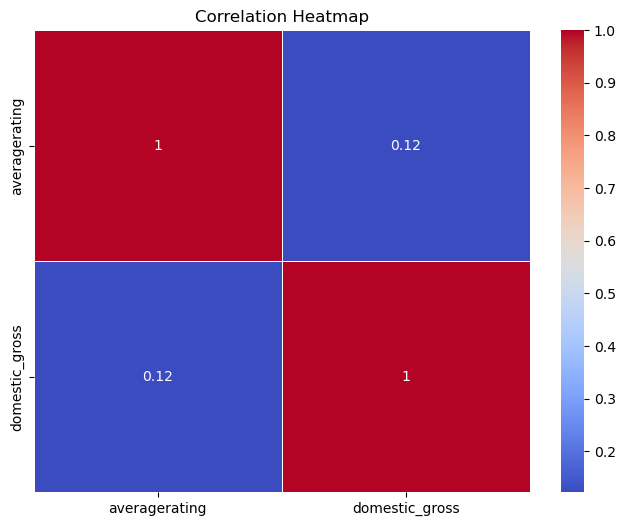

In [323]:
# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

There is a positive correlation between average rating and domestic gross but it is relatively weak. 

In [324]:
#Determining the most popular genres based on the number of movies released.

# Creating a DataFrame with one row per genre per movie
melted_genres_df = genres_df.melt(value_name='genre').dropna()

# Counting the number of movies per genre
genre_counts = melted_genres_df['genre'].value_counts()

# Finding the most popular genre
most_popular_genre = genre_counts.idxmax()
most_popular_genre_count = genre_counts.max()
print(f"The most popular genre is {most_popular_genre} with {most_popular_genre_count} movies.")

The most popular genre is Drama with 1734 movies.


# Bivariate analysis between runtime and box office earnings

In [325]:
#correlation between runtime and box office earnings
correlation = df['runtime_minutes'].corr(df['domestic_gross'])
if correlation > 0:
    feedback = "There is a positive correlation between runtime and domestic gross."
elif correlation < 0:
    feedback = "There is a negative correlation between runtime and the domestic gross."
else:
    feedback = "There is no significant correlation between runtime and the domestic gross."
print(correlation)
print(feedback)

0.13054866790342642
There is a positive correlation between runtime and domestic gross.


In [326]:
correlation_matrix = df[[ 'runtime_minutes', 'domestic_gross']].corr()
print(correlation_matrix)

                 runtime_minutes  domestic_gross
runtime_minutes         1.000000        0.130549
domestic_gross          0.130549        1.000000


C:\Users\Sieku\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sieku\anaconda3\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, 'domestic gross')

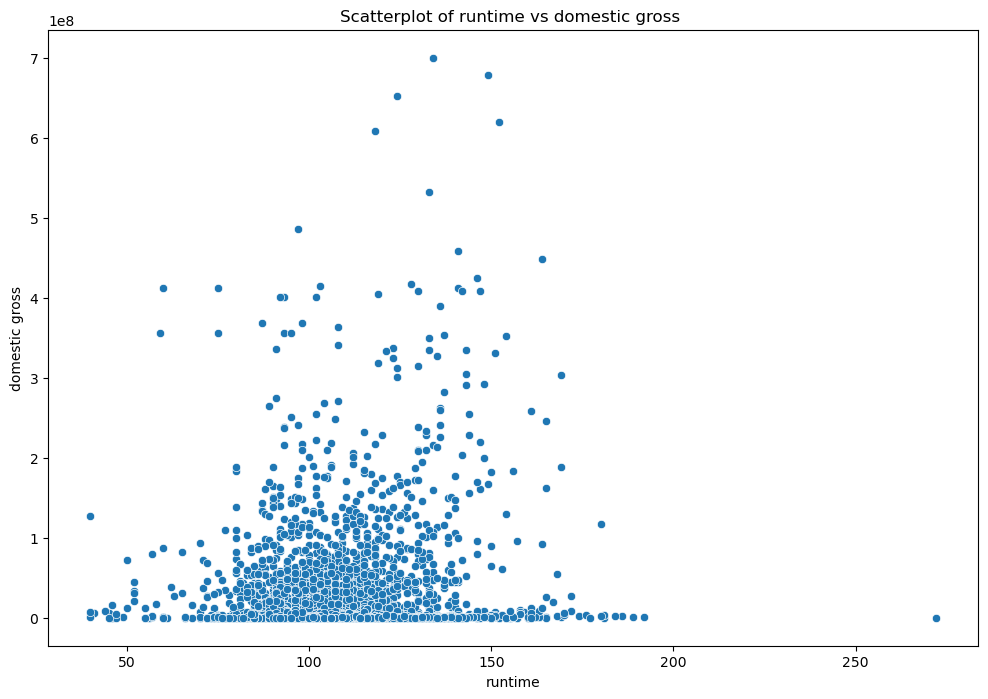

In [327]:
# Creating a scatterplot to visualize the relationship
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='runtime_minutes', y='domestic_gross')
plt.title('Scatterplot of runtime vs domestic gross ')
plt.xlabel('runtime')
plt.ylabel('domestic gross')

# Analysis to find the correlation of popular genres to Domestic gross 

In [329]:
# Defining the popular genres analyze
genres_to_analyze = ['Drama', 'Documentary', 'Comedy', 'Action', 'Adventure', 'Thriller', 'Horror', 'Science Fiction']

# Create an empty dictionary to store genre correlations with domestic gross
genre_correlations = {}

# Calculate the correlations for each genre
for genre in genres_to_analyze:
    genre_data = df[df['genres'].str.contains(genre, case=False, na=False)]
    correlation = genre_data['domestic_gross'].corr(genre_data['numvotes'])
    genre_correlations[genre] = correlation

# Create a DataFrame from the genre correlations
genre_correlation_df = pd.DataFrame(list(genre_correlations.items()), columns=['Genre', 'Correlation'])

# Sort the DataFrame by correlation values
genre_correlation_df = genre_correlation_df.sort_values(by='Correlation', ascending=False)
genre_correlation_df

,Genre,Correlation
5,Thriller,0.766348
3,Action,0.756357
2,Comedy,0.700060
4,Adventure,0.698739
6,Horror,0.643491
0,Drama,0.563014
1,Documentary,-0.050340
7,Science Fiction,NaN


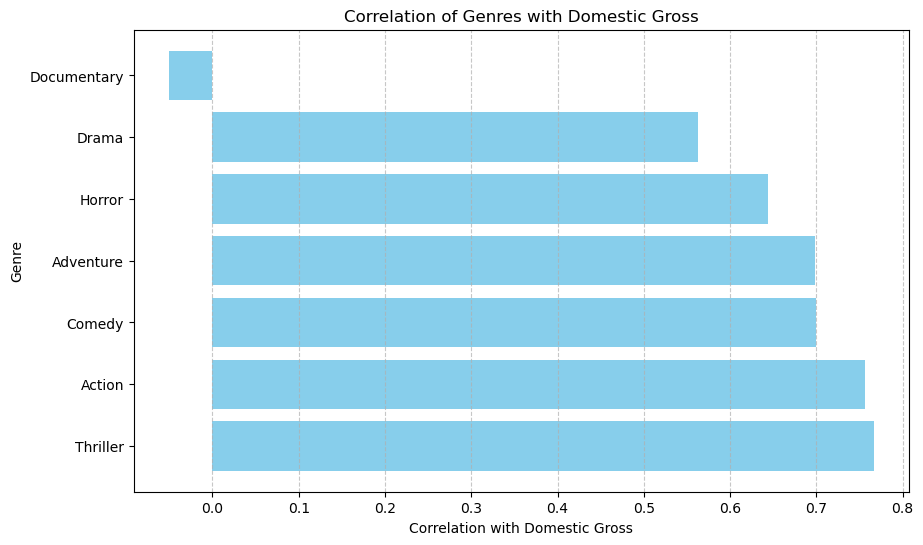

In [330]:
# Createing a bar plot to visualize the genre correlations
plt.figure(figsize=(10, 6))
plt.barh(genre_correlation_df['Genre'], genre_correlation_df['Correlation'], color='skyblue')
plt.xlabel('Correlation with Domestic Gross')
plt.ylabel('Genre')
plt.title('Correlation of Genres with Domestic Gross')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Thriller, action are the genres with the highest correlation to Domestic gross followed by comedy and adventure.

In [331]:
df

,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,domestic_gross,foreign_gross
0,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,1100000.0,0.0
1,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,744000.0,8000000.0
2,On the Road,2014,89.0,Drama,6.0,6,744000.0,8000000.0
3,On the Road,2016,121.0,Drama,5.7,127,744000.0,8000000.0
4,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,58200000.0,129900000.0
...,...,...,...,...,...,...,...,...
2968,The Chambermaid,2018,102.0,Drama,7.1,147,300.0,0.0
2969,How Long Will I Love U,2018,101.0,Romance,6.5,607,747000.0,82100000.0
2970,Helicopter Eela,2018,135.0,Drama,5.4,673,72000.0,0.0
2971,Last Letter,2018,114.0,"Drama,Romance",6.4,322,181000.0,0.0


# CONCLUSION

Microsoft should consider the following;

1.Optimal Runtime:
The analysis of film runtimes revealed that movies with a duration of around 90 minutes are the most prevalent. This finding suggests that,audiences may prefer films of this length. However, it's important to note that runtimes ranging from 50 to 90 minutes are also well-represented. I recommend considering these durations for the film production, with the understanding that exceptionally long films (e.g., 300 minutes) are outliers and may not align with audience preferences.

2.Engagement and Popularity:
The positive correlation between ratings and the number of votes indicates that films with higher ratings tend to attract more viewer engagement and participation. Therefore, producing a film that resonates with audiences and garners positive reviews is likely to result in increased viewer involvement and word-of-mouth marketing.

3.Box Office Success:
The positive correlation between ratings and domestic gross underscores the importance of producing high-quality films. A well-received film not only pleases audiences but is also likely to perform well at the box office. Thus, prioritizing the production of high-quality content can lead to financial success. This means selection of the top rated studios would be wise.

4.Runtime and Earnings:
The positive correlation between runtime and domestic gross suggests that the duration of a film can influence its box office performance. While longer films may have higher earning potential, we should consider producing films with moderate runtimes that align with audience preferences to achieve a balance between viewer satisfaction and financial success.




And therefore my advice to the Microsoft head to is consider Comedy with 90 minutes as the runtime as the film to create reason being;

1.Comedy has a high popularity meaning it is well received by a larger audience, which also influences the number of votes. Thrillers, Horrors and Action can also be put into consideration as the second and third consecutively.

2.Using a runtime of 90 minutes, this will influence the number of votes which will translate to higher audience engagement which automatically translate to high domestic gross.


